In [50]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
from scipy.stats import bootstrap
import random
import functions as f

In [53]:
%run functions.py

In [36]:
#GLOBAL CONSTANTS
clv_thoery = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

## PARETO (not censored)

In [82]:
shape = 3
scale = 1
size=10000
n=10000
duree_obs = 12*2
clv_theory = (shape * scale) /(shape - 1 )

In [38]:
def generate_nc_pareto(clv_th, size):
    shape = 3

    T = pareto.rvs(shape, scale = 1, size=size) 

    return T

In [39]:
def generate_c_pareto(clv_th, size, obs_duration):
    shape = 3
    #T = (np.random.pareto(a=shape, size=size) + 1 ) * scale  # pareto 2 
    T = pareto.rvs(shape, scale = 1, size=size) 
    ancient = obs_duration* np.random.rand(size) +1   # uniform distribution
    Y = T * (T <= ancient) + ancient * (T > ancient)
    return Y, ancient

In [40]:
def pareto_nc_clv_estimator(Y):
    n = len(Y)
    denom = 1 - (1/n)*(np.sum(np.log(Y)))
    return 1 / denom

In [41]:
def pareto_c_clv_estimator(Y, ancient):
    n = len(Y) - len(np.where(Y==ancient)[0])
    denom = 1 - (1/n)*(np.sum(np.log(Y)))
    return 1 / denom

In [72]:
def CI_pareto_c_clv(a,Y,ancient):

    len_A = len(np.where(Y!=ancient)[0])
    lower = 1- (np.sum(np.log(Y)) / (len_A - 1.96* np.sqrt(len_A)))
    upper = 1- (np.sum(np.log(Y)) / (len_A + 1.96* np.sqrt(len_A)))
    
    return 1/upper, 1/lower

<AxesSubplot: ylabel='Count'>

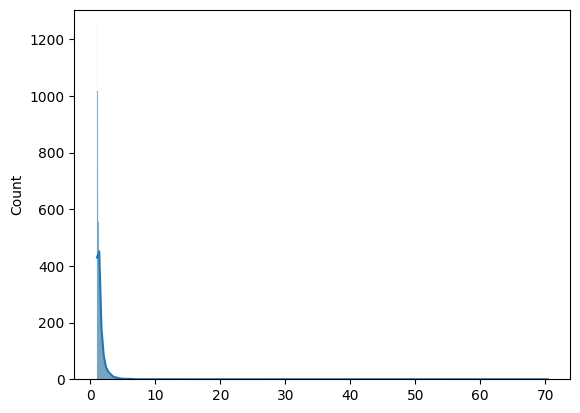

In [43]:
Tn = generate_nc_pareto(clv_theory, size)
sns.histplot(Tn, kde = True)

In [44]:
# CONSTANT desining if the data is going to be censored or not
censored = 0
# Monte Carlo simulation
clv_pareto, Y_n = f.monte_carlo(clv_theory, size, n, censored, pareto_nc_clv_estimator, generate_nc_pareto)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 1.50 
 	 CLV real = 1.499928  
 	 Standard deviation CLV= 0.007441


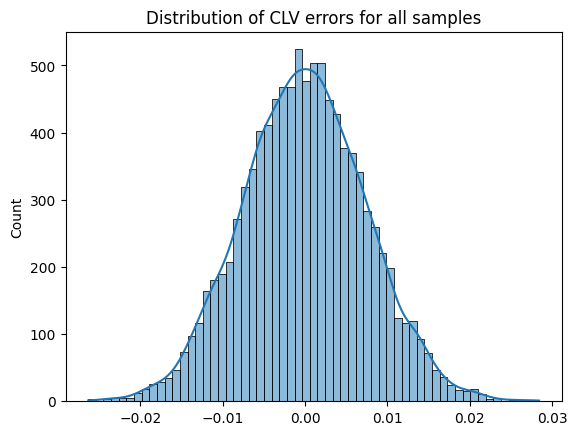

In [45]:
# plot clv errors distribution
f.print_conv_plot_distribution(size, n ,clv_theory, clv_pareto)

For all the samples $Y_i$ for $i\in \{1,...,n\}$ the prediction error $(prediction_i - expectation_i)$ folllows a gaussian distribution with mean 0.


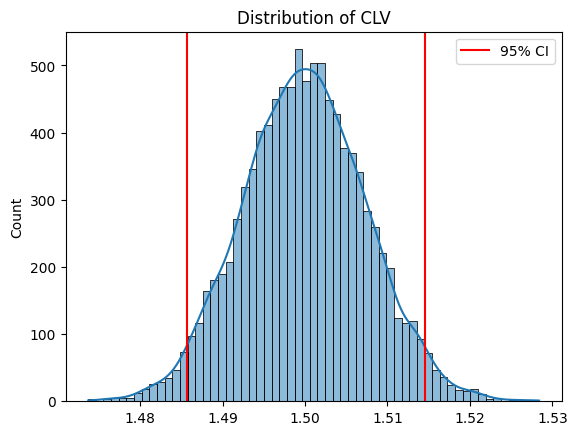

IC = [1.49 , 1.51 ] 


In [55]:
lower_pareto_nc, upper_pareto_nc = CI_plot_95(clv_pareto, 0.05)

In [57]:
# GENERATE one sample to study the effect of boostrapping
Y_n = generate_nc_pareto(clv_theory, size)

In [61]:
_ , clv_pareto_b = bootstrap_samples(Y_n, censored, pareto_nc_clv_estimator)

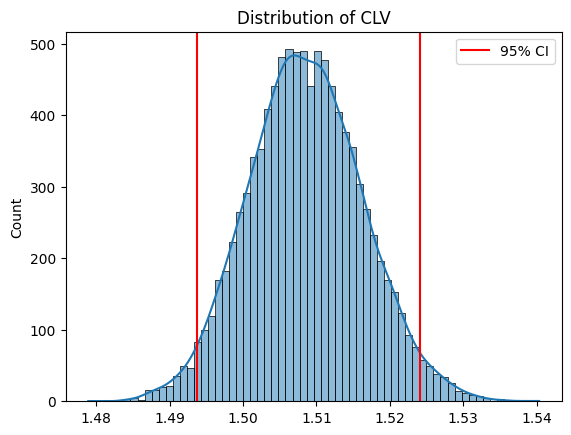

IC = [1.49 , 1.52 ] 


In [63]:
lower_pareto_ncb, upper_pareto_ncb  = CI_plot_95(clv_pareto_b, 0.05)

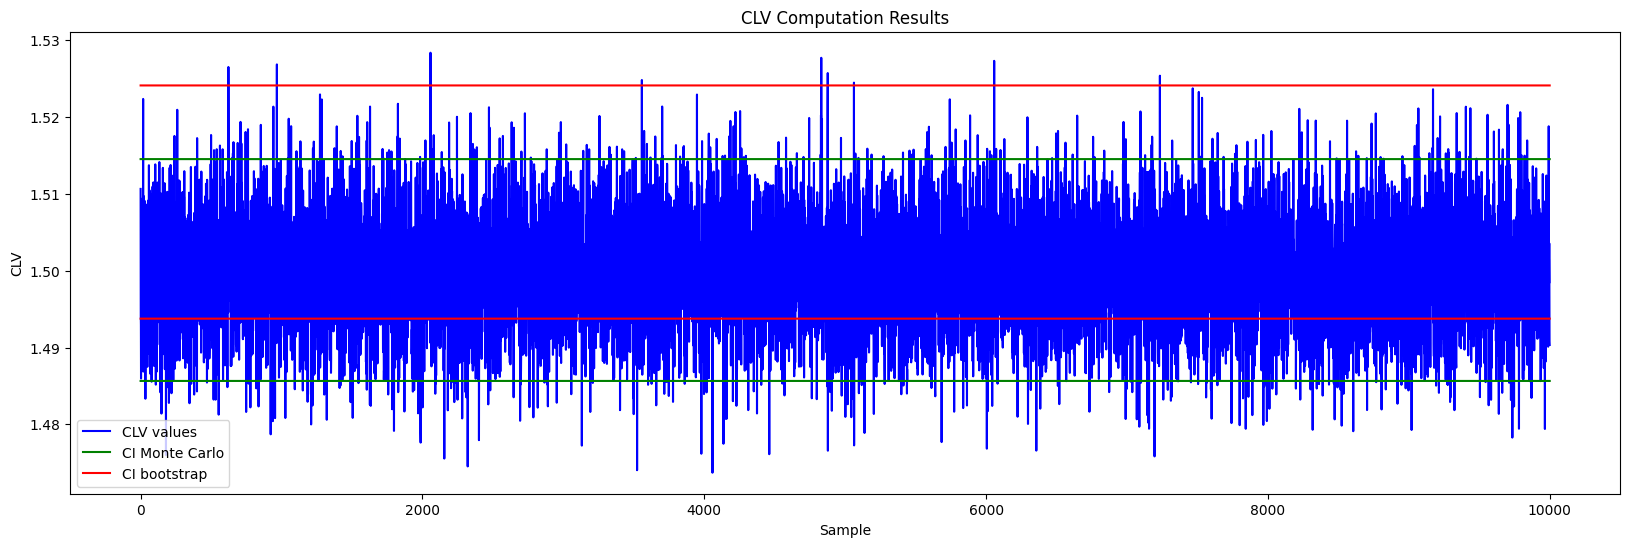

In [67]:
# plot confidence interval
CI_monoplot(clv_pareto, np.full(size, lower_pareto_nc),np.full(size, upper_pareto_nc), np.full(size, lower_pareto_ncb),np.full(size, upper_pareto_ncb) )

In [ ]:
# Tn = (Tn,)
# boo = bootstrap(Tn, pareto_nc_clv_estimator, n_resamples=10000)
# boo.confidence_interval
# boo.bootstrap_distribution

<AxesSubplot: ylabel='Count'>

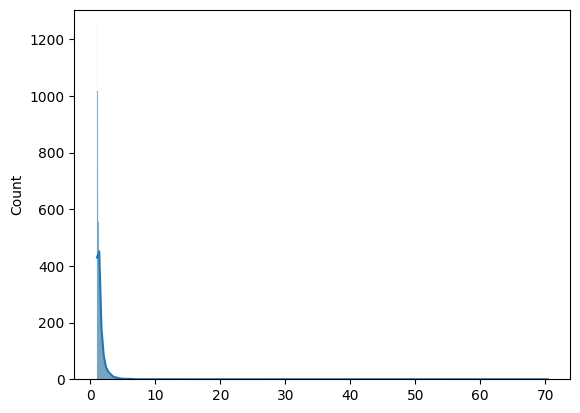

In [47]:
sns.histplot(Tn, kde=True)

When working with real world data, we are more likely to have only one dataset, we need to generate ou IC from bootstrap. 
Let's  study the impact of bootstrap from our real world dataset

# Pareto (censored)

<AxesSubplot: ylabel='Count'>

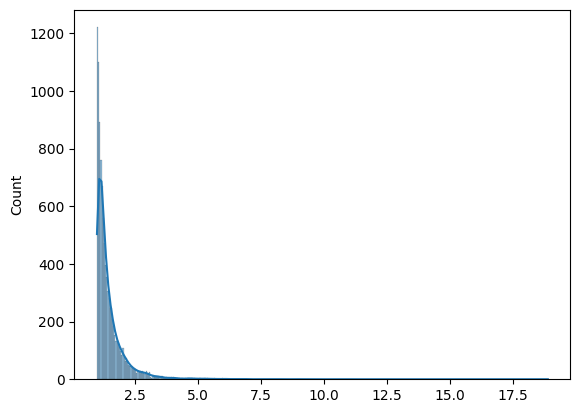

In [86]:
Yn, ancient = generate_c_pareto(clv_theory, size, duree_obs)
sns.histplot(Yn, kde = True)

In [84]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_pareto_c, Y_n = monte_carlo(clv_theory, size, n, censored, pareto_c_clv_estimator, generate_c_pareto)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 1.50 
 	 CLV real = 1.500073  
 	 Standard deviation CLV= 0.007552


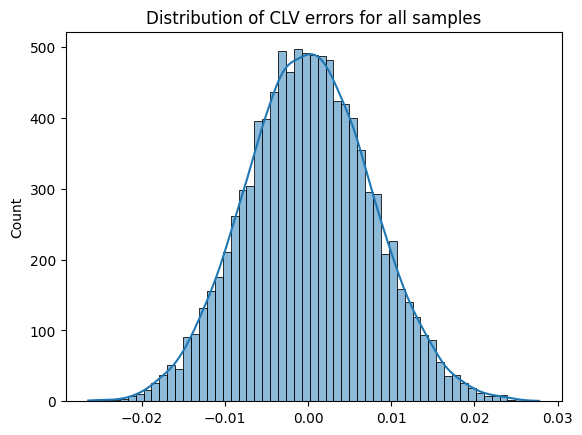

In [85]:
print_conv_plot_distribution(size, n ,clv_theory, clv_pareto_c)

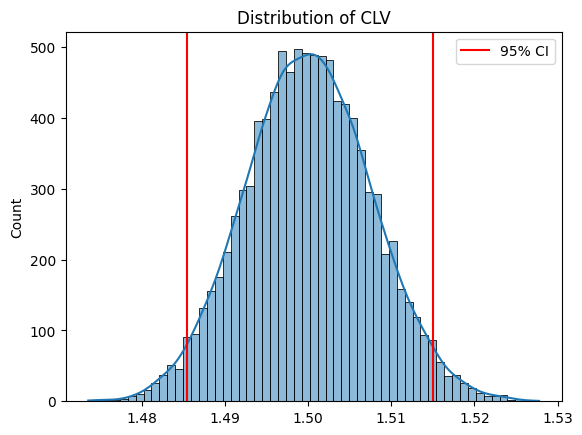

IC = [1.49 , 1.52 ] 


In [88]:
lower_pareto_c, upper_pareto_c = CI_plot_95(clv_pareto_c, 0.05)

In [89]:
# GENERATE one sample to study the effect of boostrapping
Y_n =[]
T, A = generate_c_pareto(clv_theory, size, DureeObs)
Y_n.append(T)
Y_n.append(A)

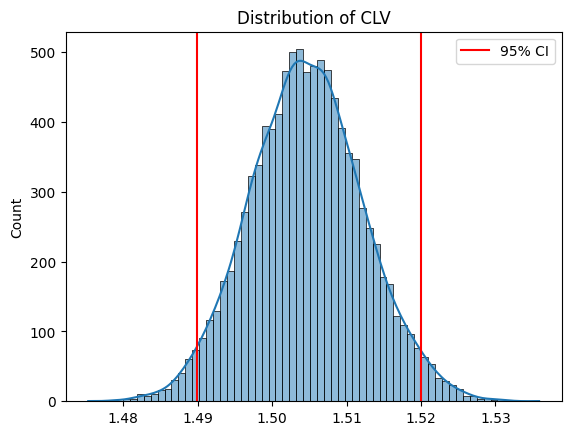

IC = [1.49 , 1.52 ] 


In [93]:
_,_ , clv_pareto_cb = bootstrap_samples(Y_n, censored, pareto_c_clv_estimator)
lower_pareto_cb, upper_pareto_cb  = CI_plot_95(clv_pareto_cb, 0.05)

In [94]:
print("Confidence level : %.2f" % (confidence_lvl(lower_pareto_cb, upper_pareto_cb, clv_pareto_c)))

Confidence level : 90.58


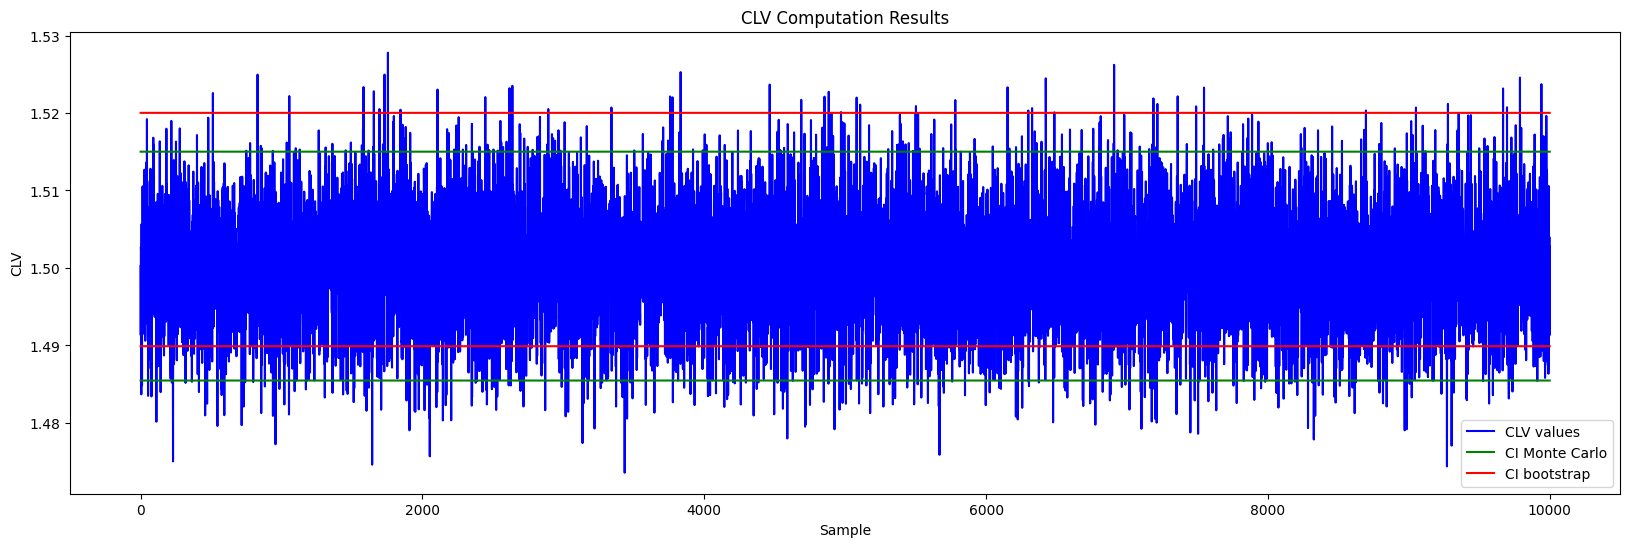

In [96]:
# plot confidence interval
CI_monoplot(clv_pareto_c, np.full(size, lower_pareto_c),np.full(size, upper_pareto_c), np.full(size, lower_pareto_cb),np.full(size, upper_pareto_cb) )

In [69]:
# CONSTANT desining if the data is going to be censored or not
censored = 1
# Monte Carlo simulation
clv_pareto, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.pareto_c_clv_estimator, f.generate_c_pareto)

AttributeError: module 'functions' has no attribute 'pareto_c_clv_estimator'

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 1.499928  
 	 Standard deviation CLV= 0.007441


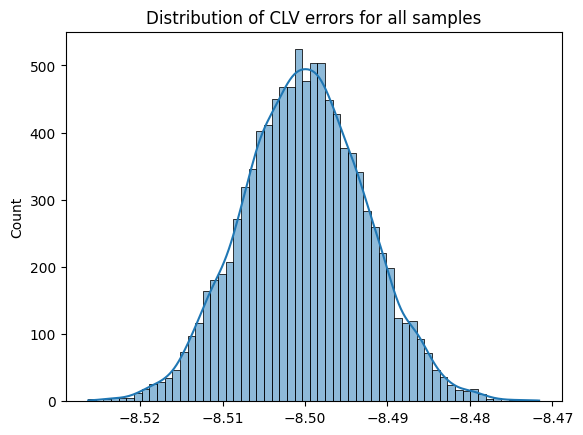

In [70]:
# plot clv errors distribution
f.print_conv_plot_distribution(size, n ,clv_theory, clv_pareto)

####IC Theorique de la pareto

In [73]:
CI_pareto_c_clv(2,Y_n,ancient)

(1.4938941324465134, 1.5239894260710787)

In [ ]:
Y = generate_pareto(scale, size, DureeObs)
sns.histplot(Y, kde = True)

In [ ]:
def generate_real_data(CLV, n, DureeObs):
    # GENERATOR WITH TWO PARETO DISTRIBUTION
    # Parameters
    n = 10000
    DureeObs = 12*2

    moyenne1 = 4  # Mean in the first group
    shape1 = 0.1  # Small shape: close to exponential distribution

    moyenne2 = 9  # Mean in the second group
    shape2 = 0.4  # Larger shape: heavy-tailed distribution

    ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

    # Expectation across both groups
    CLV = ratio_classe*moyenne1+(1-ratio_classe)*moyenne2

    # Data generation
    location1 = 0
    scale = moyenne1*(1-shape1)-location1
    T1 = np.random.gamma(shape1, scale, n)

    location2 = 0
    scale = moyenne2*(1-shape2)-location2
    T2 = np.random.gamma(shape2, scale, n)

    ber = np.random.rand(n) > ratio_classe

    T = (1-ber)*T1 + ber*T2

    Duree_depuis_souscription = DureeObs * np.random.rand(n)
    Y = T*(T<Duree_depuis_souscription)
    #Y = np.where(T<Duree_depuis_souscription, T, np.nan)
    Y = np.where(T<Duree_depuis_souscription, T, Duree_depuis_souscription)
    return Y, Duree_depuis_souscription

    #The data is now (Y, Duree_depuis_souscription)

In [ ]:
# GENERATOR WITH TWO PARETO DISTRIBUTION
# Parameters
n = 10000
DureeObs = 12*2

moyenne1 = 4  # Mean in the first group
shape1 = 0.1  # Small shape: close to exponential distribution

moyenne2 = 9  # Mean in the second group
shape2 = 0.4  # Larger shape: heavy-tailed distribution

ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

# Expectation across both groups
CLV = ratio_classe*moyenne1+(1-ratio_classe)*moyenne2

# Data generation
location1 = 0
scale = moyenne1*(1-shape1)-location1
T1 = np.random.gamma(shape1, scale, n)

location2 = 0
scale = moyenne2*(1-shape2)-location2
T2 = np.random.gamma(shape2, scale, n)

ber = np.random.rand(n) > ratio_classe

T = (1-ber)*T1 + ber*T2

Duree_depuis_souscription = DureeObs * np.random.rand(n)
Y = T*(T<Duree_depuis_souscription)
#Y = np.where(T<Duree_depuis_souscription, T, np.nan)
Y = np.where(T<Duree_depuis_souscription, T, Duree_depuis_souscription)


#The data is now (Y, Duree_depuis_souscription)

In [ ]:
sns.histplot(Y, kde=True)

In [ ]:
pareto_clv_estimator(Y, Duree_depuis_souscription)

In [ ]:
geom_c_clv_estimator(Y, Duree_depuis_souscription)

In [ ]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_geom_c, Y_n = monte_carlo(CLV, size, n, censored, geom_c_clv_estimator, generate_exponential)

In [ ]:

for i in range(n) :

    Y_new, ancient_new = generate_pareto(scale, size, DureeObs, shape)
    clv_pareto = pareto_clv_estimator(Y_new, ancient_new)
